# **Machine Learning: A Predictive Model for house prices in Ames, Iowa**

Steps Involved
-Importing the required packages into our python environment
-Importing the house price data and do some EDA on it
-Data Visualization on the house price data
-Feature Selection & Data Split
-Modeling the data using the algorithms
-Evaluating the built model using the evaluation metrics

In this study, we will use a housing dataset presented by De Cock (2011). This dataset describes the sales of residential units in Ames, Iowa starting from 2006 until 2010. The dataset contains a large number of variables that are involved in determining a house price. The dataset contains 2930 records (rows) and 82 features (columns).

# **Importing packages and Data Preparation**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from math import sqrt
from pylab import rcParams
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
train_data = pd.read_csv('train.csv', index_col='Id')
test_data = pd.read_csv('test.csv', index_col='Id')


# check shape
print(train_data.shape)
print(test_data.shape)

(1460, 80)
(1459, 79)


### **Separating Target and Features**

In [4]:
X_train = train_data.drop(['SalePrice'], axis=1)
y_train = train_data.SalePrice

# **EXPLORATORY DATA ANALYSIS**

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000




*   **Mean price** is 180921.19  and  **Median price** is 163000.00
* **Average lot** area of the houses in our dataset is 10,516.82 ft2



In [9]:
train_data.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

# **CORRELATION MATRIX of different variables**

In [10]:
train_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


Text(171.72222222222234, 0.5, 'Features')

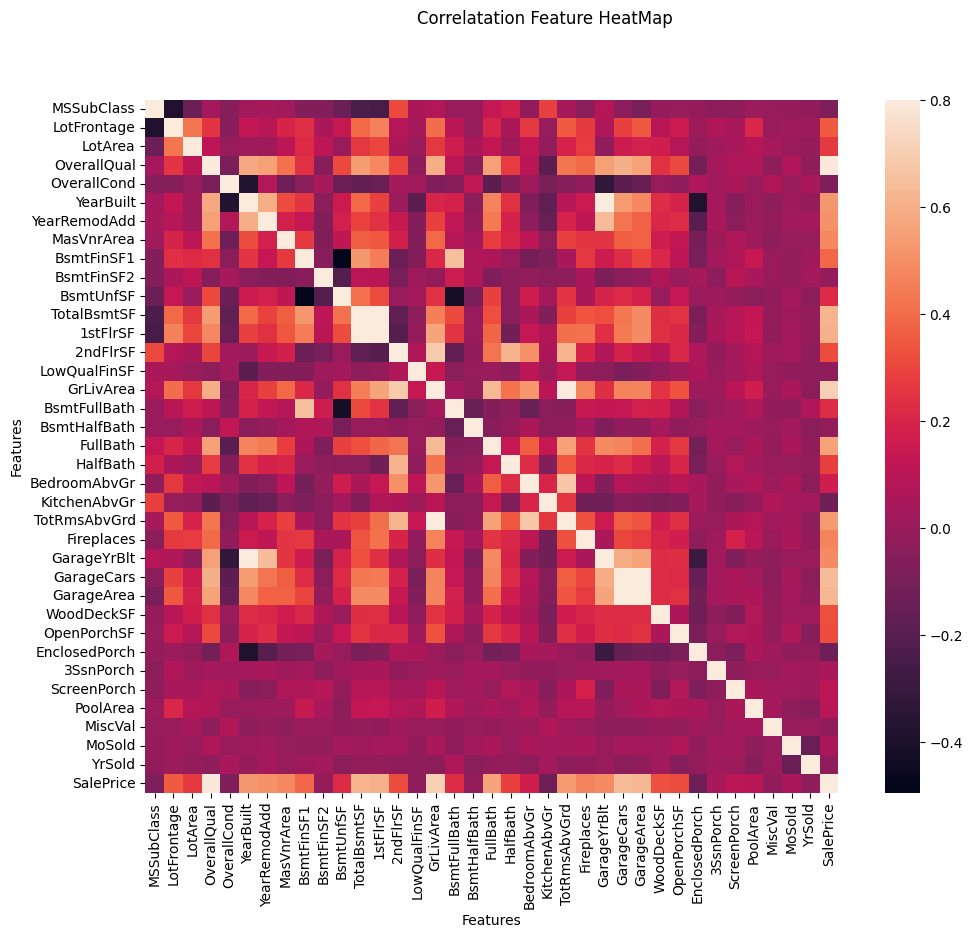

In [11]:
#correlation matrix
corr_mat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.8,square=True)

plt.suptitle("Correlatation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

In [12]:
print("Correlation Values")

corr = train_data.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Overall quality, Gr Living Area, Garage Area, etc., has high correlation with Sale Price.

## ***A look at Numerical and Categorical features in the dataset***

In [13]:
train_data_numerical = train_data.select_dtypes(include='number')
train_data_categorical = train_data.select_dtypes(exclude= 'number')

In [14]:
train_data_numerical

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


We have around 37 numerical features

<Figure size 800x600 with 0 Axes>

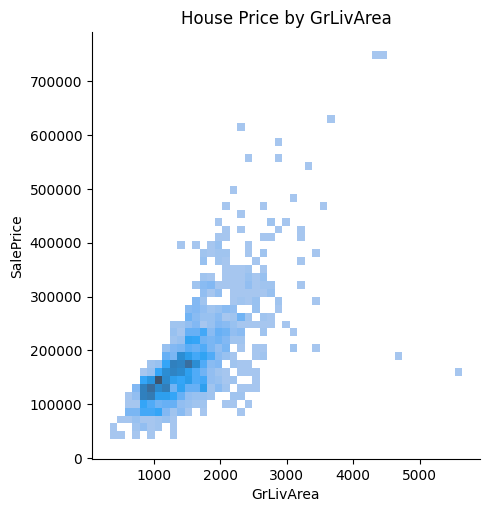

In [15]:
plt.figure(figsize=(8, 6))
sns.displot(x='GrLivArea', y='SalePrice', data=train_data, palette='GnBu')
title = plt.title('House Price by GrLivArea')

Living area in the Ames dataset seems to have linear relationship with Sale Price, which is self-explanatory as bigger living area is a strong influencer while buying a home.

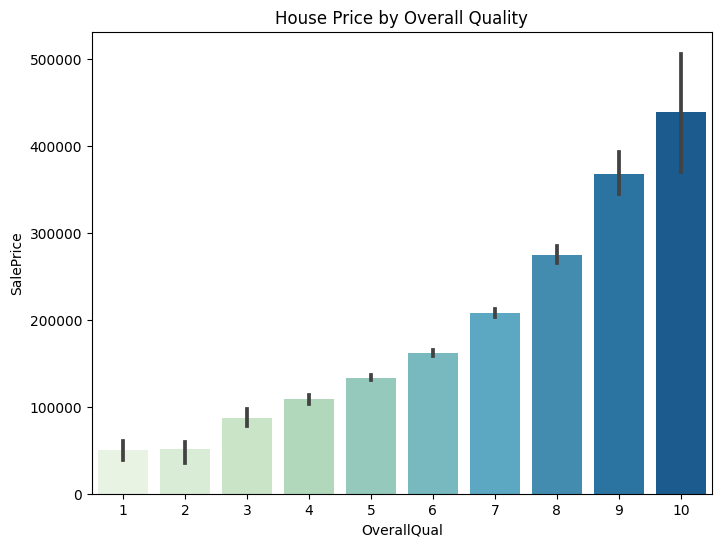

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x='OverallQual', y='SalePrice', data=train_data, palette='GnBu')
title = plt.title('House Price by Overall Quality')

Feature like overall quality of the house also influence price of the property. As you can see houses with a score of 10 are expensive than average homes.

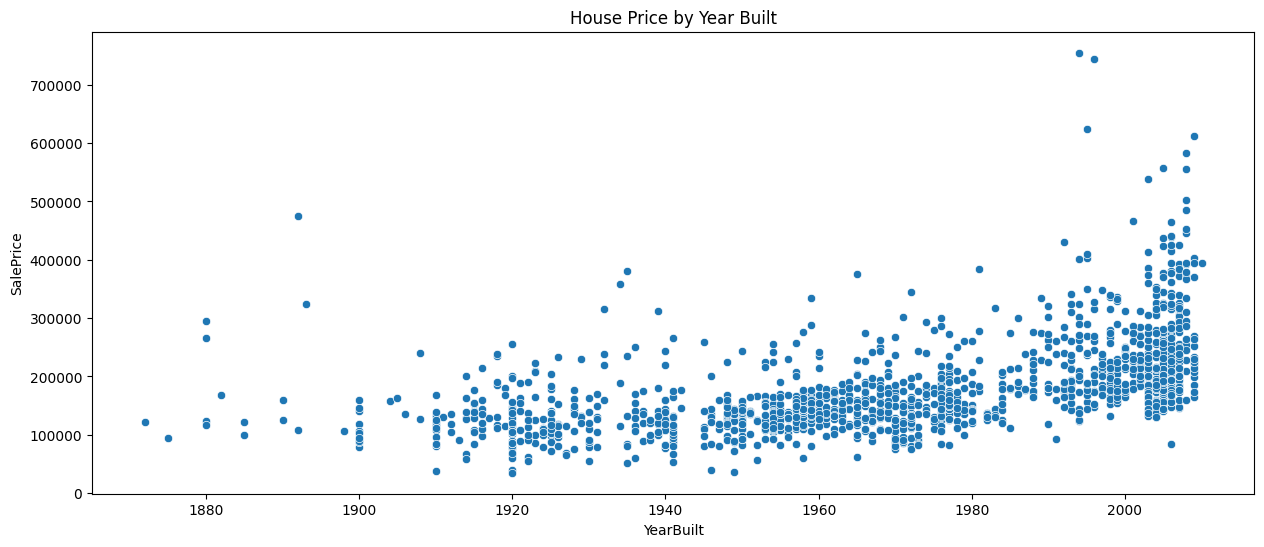

In [17]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data)
title = plt.title('House Price by Year Built')

The relation of year of built and the price of the house is very interesting. The houses that are too old are expensive may be due to historical value. Similarly, the houses that are relatively newer are expensive too, which is self-explanatory. However the houses that are neither too old nor new have a lower price value since they have neither any historical value associated with them, nor they are new.

**Categorical variables**

In [18]:
cat_features = train_data_categorical
cat_features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


There are 43 categorical features in our housing dataset.

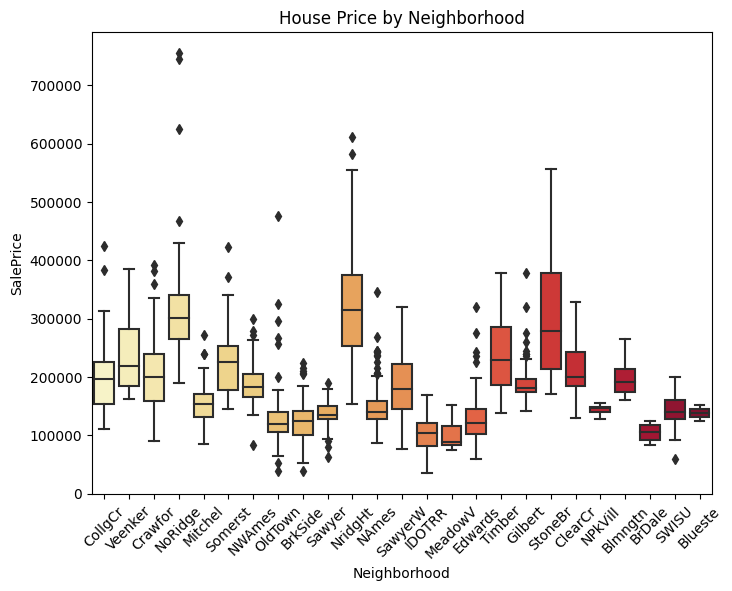

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data, palette='YlOrRd')
title = plt.title('House Price by Neighborhood')
tick = plt.xticks(rotation=45)

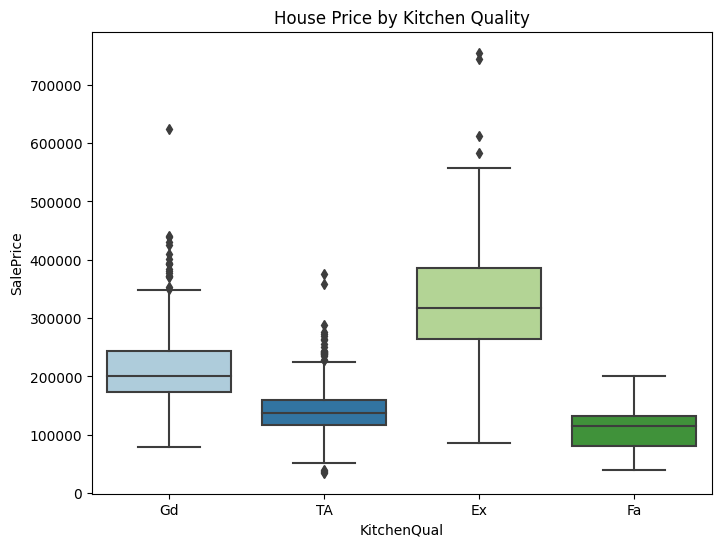

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='KitchenQual', y='SalePrice', data=train_data, palette='Paired')
title = plt.title('House Price by Kitchen Quality')

Kitchen Quality is another important feature to predict house price. There is a very big difference in price between houses with different kitchen quality. For example, the average price difference between a house with a good kitchen and one with an excellent kitchen is about $120,000

# **Top Correlated Features**

Text(99.74999999999999, 0.5, 'Features')

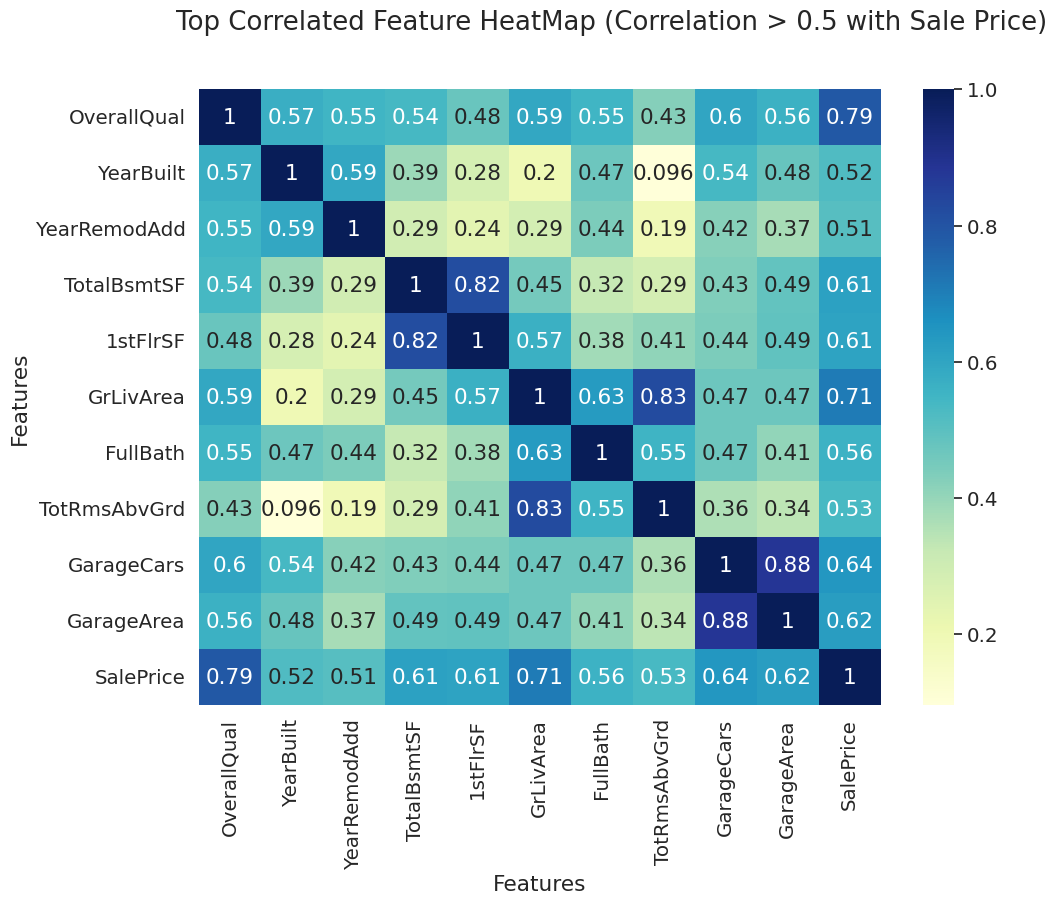

In [21]:
# most correlated features
corr_mat = train_data.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g = sns.heatmap(train_data[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

# **EXPLORING TARGET VARIABLE**

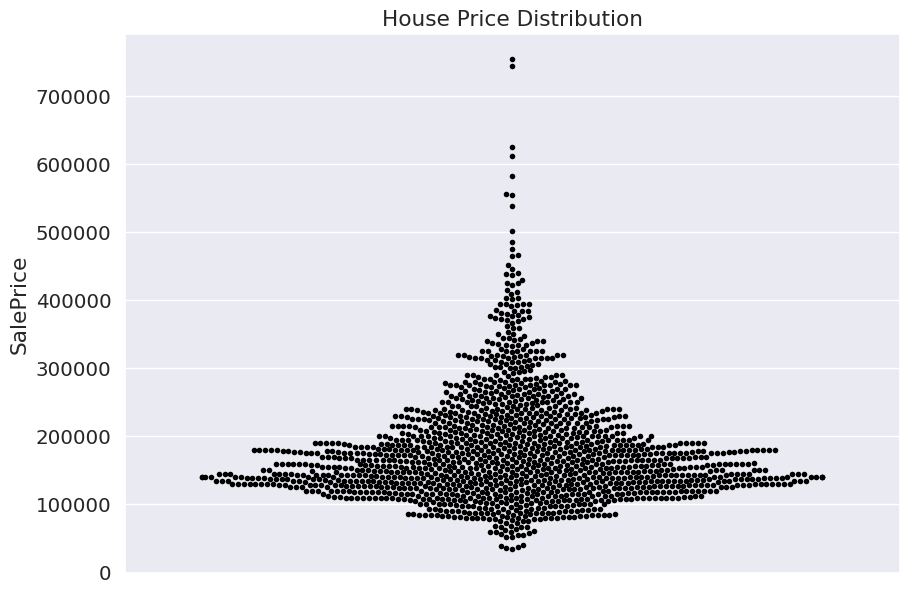

In [22]:
plt.figure(figsize=(10,7))
#sns.violinplot(y_train,  color="teal")
sns.swarmplot(y_train, color="black", size=4, edgecolor="white")
title = plt.title("House Price Distribution")

In [23]:
print(f"""Skewness: {train_data['SalePrice'].skew()}
Kurtosis: {train_data['SalePrice'].kurt()}""")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


The data distribution is more right-skewed and leptokurtic in nature. The Kurtosis and skewness score confirms it. This can be solved using log normalization

# **DATA PREPROCESSING AND FEATURE ENGINEERING**

### **1. OUTLIER REMOVAL**

In the paper in which the dataset was first introduced by De Cock (2011), the author states that there are five unusual values and outliers in the dataset, and encourages the removal of these outliars. He suggested plotting SalePrice against Gr Liv Area to spot the outliers. We will do that now:

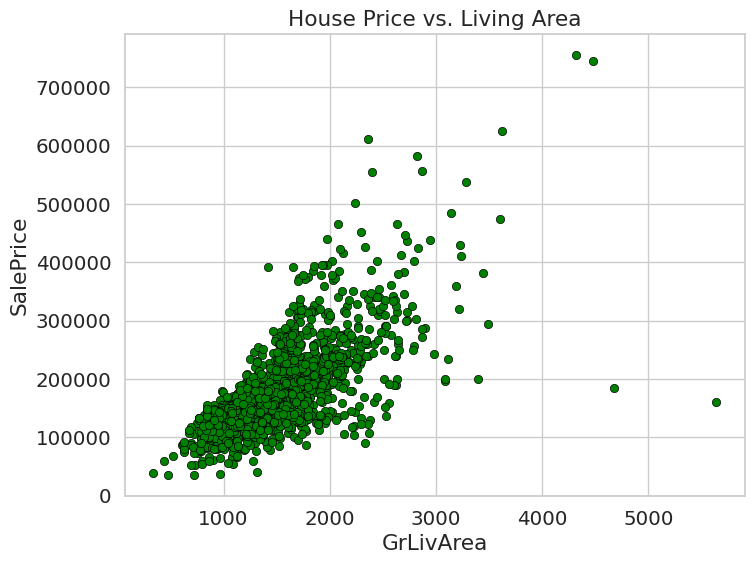

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', color = "green", edgecolor='black', data=train_data)
title = plt.title('House Price vs. Living Area')

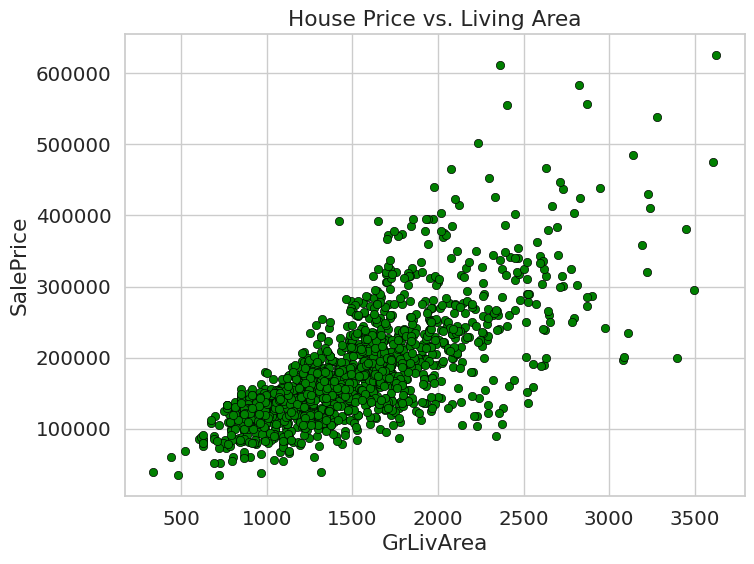

In [25]:
train_data = train_data[train_data["GrLivArea"] < 4000]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', color = "green", edgecolor='black', data= train_data)
title = plt.title('House Price vs. Living Area')

<Axes: xlabel='EnclosedPorch', ylabel='SalePrice'>

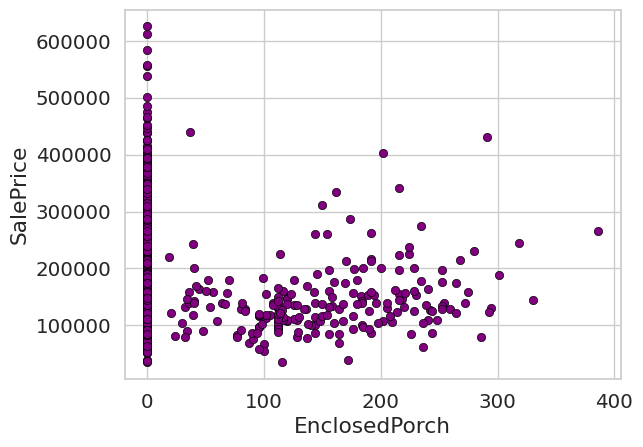

In [26]:
#Deleting outliers
train_data =  train_data.drop( train_data[( train_data['EnclosedPorch']>400)].index)

#Deleting outliers
train_data =  train_data.drop( train_data[( train_data['SalePrice']>700000)].index)

#check plot again
sns.scatterplot(x='EnclosedPorch', y='SalePrice', color = "purple", edgecolor='black', data= train_data)

## **Normalization of target variable**

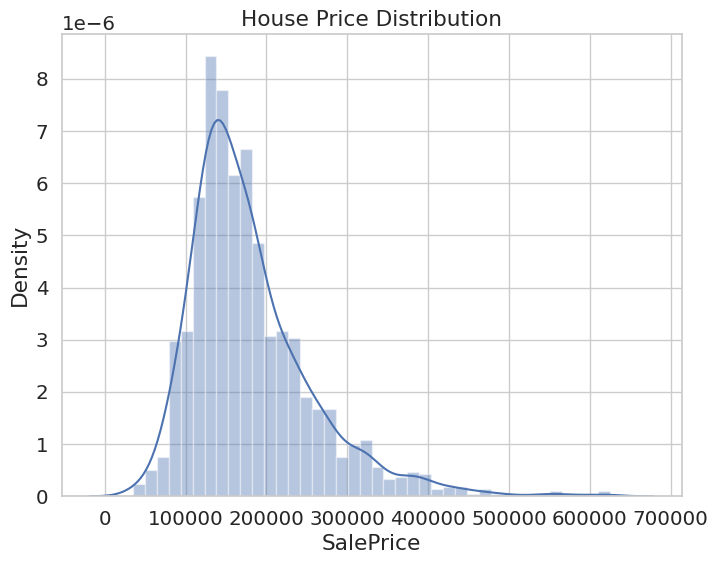

In [27]:
plt.figure(figsize=(8,6))
sns.distplot(train_data['SalePrice'])
title = plt.title("House Price Distribution")

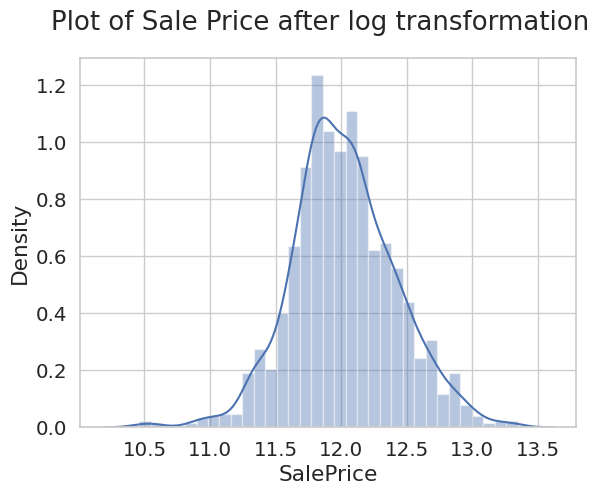

In [28]:
train_data['SalePrice'] = np.log(train_data['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(train_data['SalePrice'])
plt.show()

# **MISSING DATA**

In [29]:
#function to see the missing data in a dataframe
def missing_data(df,n):
    total = df.isnull().sum().sort_values(ascending=False)          # Total No of missing values
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % of Missing values
    No_unique_val = df.nunique()                                   # No of unique values
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1,
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)

    print(missing_data.head(n))



In [30]:
#training data
missing_data(train_data,20)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1451         99.725086                 2
MiscFeature                      1401         96.288660                 4
Alley                            1364         93.745704                 2
Fence                            1176         80.824742                 4
FireplaceQu                       690         47.422680                 5
LotFrontage                       259         17.800687               109
GarageYrBlt                        81          5.567010                97
GarageCond                         81          5.567010                 5
GarageType                         81          5.567010                 6
GarageFinish                       81          5.567010                 3
GarageQual                         81          5.567010                 5
BsmtExposure                       38          2.611684                 4
BsmtFinType2                       38 

In [31]:
train_data['PoolQC'].unique()

array([nan, 'Fa', 'Gd'], dtype=object)

In [32]:
#test data
missing_data(test_data,34)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1456         99.794380                 2
MiscFeature                      1408         96.504455                 3
Alley                            1352         92.666210                 2
Fence                            1169         80.123372                 4
FireplaceQu                       730         50.034270                 5
LotFrontage                       227         15.558602               115
GarageYrBlt                        78          5.346127                97
GarageFinish                       78          5.346127                 3
GarageQual                         78          5.346127                 4
GarageCond                         78          5.346127                 5
GarageType                         76          5.209047                 6
BsmtCond                           45          3.084304                 4
BsmtExposure                       44 

In [33]:
# calculate total number of null values in training data
null_train = train_data.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = test_data.isnull().sum().sum()
print(null_test)

6950
7000


In [34]:
train_label = train_data['SalePrice'].reset_index(drop=True)

# # drop 'SalePrice' column from df_train
train_data = train_data.drop(['SalePrice'], axis=1)
# # now df_train contains all training features

In [35]:
def missing (df):

    # drop theses columns due to large null values or many same values
    #df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)

    # Null value likely means No Fence so fill as "None"
    df["Fence"] = df["Fence"].fillna("None")

    # Null value likely means No Fireplace so fill as "None"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())

    # Null value likely means  typical(Typ)
    df["Functional"] = df["Functional"].fillna("Typ")

    # Only one null value so fill as the most frequent value(mode)
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

    # Only one null value so fill as the most frequent value(mode)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

    # Very few null value so fill with the most frequent value(mode)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

    # Null value likely means no masonry veneer
    df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #so fill as o

    # Only one null value so fill as the most frequent value(mode)
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

    #MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

    #Null value likely means no Identified type of dwelling so fill as "None"
    df['MSSubClass'] = df['MSSubClass'].fillna("None")

    # Null value likely means No Garage, so fill as "None" (since these are categorical features)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')

    # Null value likely means No Garage and no cars in garage, so fill as 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)

    # Null value likely means No Basement, so fill as 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)

    # Null value likely means No Basement, so fill as "None" (since these are categorical features)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')

    return df

In [36]:
train_data = missing(train_data)
test_data = missing(test_data)

In [37]:
# calculate total number of null values in training data
null_train = train_data.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = test_data.isnull().sum().sum()
print(null_test)

4216
4218


In [38]:
def add_new_cols(df):

    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath']
                             + (0.5 * df['BsmtHalfBath']))

    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] +
                            df['ScreenPorch'] + df['WoodDeckSF'])

    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])

    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']

    return df

In [39]:
# add the new columns
train_data  = add_new_cols(train_data )
test_data = add_new_cols(test_data)

In [40]:
train_data.shape,test_data.shape

((1455, 84), (1459, 84))

# **Encoding Categorical Variables**

In [41]:
#get dummy values for categorical data
train_data = pd.get_dummies(train_data )
test_data = pd.get_dummies(test_data)

print(train_data.shape)
print(test_data.shape)

(1455, 302)
(1459, 286)


In [42]:
#align the training and testing data
train_data, test_data = train_data.align(test_data, join = 'inner', axis=1)

In [43]:
# calculate total number of null values in training data
null_train = train_data.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = test_data.isnull().sum().sum()
print(null_test)

0
0


In [44]:
X_test = test_data          # testing features

In [45]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0


In [46]:
train_data["SalePrice"] = train_label

In [47]:
train_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,0,1,0,12.109011
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,0,0,0,0,1,0,12.317167
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,0,1,0,11.849398
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,1,1,0,0,0,0,0,12.429216
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,0,1,0,11.870600


In [48]:
train_set, valid_set = train_test_split(train_data,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["SalePrice"], axis=1)  # training features
y_train = train_set["SalePrice"].copy()             # training label

X_valid = valid_set.drop(["SalePrice"], axis=1)  # testing features
y_valid = valid_set["SalePrice"].copy()               # testing label

In [49]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))
print()
print("X_test shape: {}".format(X_test.shape))

X_train shape: (1018, 285)
y_train shape: (1018,)

X_valid shape: (437, 285)
y_valid shape: (437,)

X_test shape: (1459, 285)


In [50]:
X_train.info()

X_valid.info()
y_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 1 to 1021
Columns: 285 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(37), uint8(244)
memory usage: 576.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 1022 to 1460
Columns: 285 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(37), uint8(244)
memory usage: 247.5 KB


Id
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
          ...    
1017    12.078239
1018    12.175613
1019    11.373663
1020    12.160029
1021    12.567237
Name: SalePrice, Length: 1018, dtype: float64

In [51]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = y_train.isnull().sum().sum()
print(null_t_y)

0
0


In [52]:
null_v_x = X_valid.isnull().sum().sum()
print(null_v_x)

null_v_y = y_valid.isnull().sum().sum()
print(null_v_y)

0
6


In [53]:
np.where(np.isnan(y_valid))

(array([431, 432, 433, 434, 435, 436]),)

In [54]:
# replace null values by mean value of y_valid column
mean = np.nanmean(y_valid)
y_valid = np.nan_to_num(y_valid,nan = mean)

In [55]:
#check again
np.where(np.isnan(y_valid))

(array([], dtype=int64),)

In [56]:
print("Valid data shape:")
print(X_valid.shape, y_valid.shape)
print()

Valid data shape:
(437, 285) (437,)



# **DATA MODELING**

### **1. EVALUATION METRICS**
CROSS VALIDATION AND RMSE

In [57]:
# calculating cross validation score with scoring set to negative mean absolute error
def cross_validation(model):

    scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 12, scoring = "neg_mean_squared_error"))
    mean = np.mean(scores)
    print("Mean CV score: ",mean)

In [58]:
# function to calculate Root mean square error (RMSE)
def rmse(y_pred, y_train):

    rmse_ = np.sqrt(metrics.mean_squared_error(y_pred,y_train))
    print("rmse: ", rmse_)

In [59]:
# function to plot actual vs predicited label
def actual_vs_pred_plot(y_train,y_pred):

    fig = plt.figure(figsize=(12,12))
    fig, ax = plt.subplots()

    ax.scatter(y_train, y_pred,color = "teal",edgecolor = 'lightblue')
    ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
    plt.show()

## 2. MODEL SELECTION
I tried these models namely:


*  Linear Regression
*  Ridge Regression
*  Random Forest
* K-nearest neighbour
* Stacked Regressor








# LINEAR REGRESSION

- In this model, the target value is expected to be a linear combination of the features. The coefficients are set to minimize the residual sum of squares between the target predicted and the observed features

In [60]:
reg = linear_model.LinearRegression()
cross_validation(reg)

Mean CV score:  0.48744121345317276


In [61]:
#fit on training
model_reg = reg.fit(X_train, y_train)

#predict value of sale price on the training set
y1_pred = reg.predict(X_train)

#caculate root mean square error
rmse(y1_pred,y_train)

rmse:  0.3591867019700974


In [62]:
#predict value of sale price on the validation set
y1_pred_v = reg.predict(X_valid)

#caculate root mean square error
rmse(y1_pred_v, y_valid)

rmse:  0.43361011063841487


<Figure size 1200x1200 with 0 Axes>

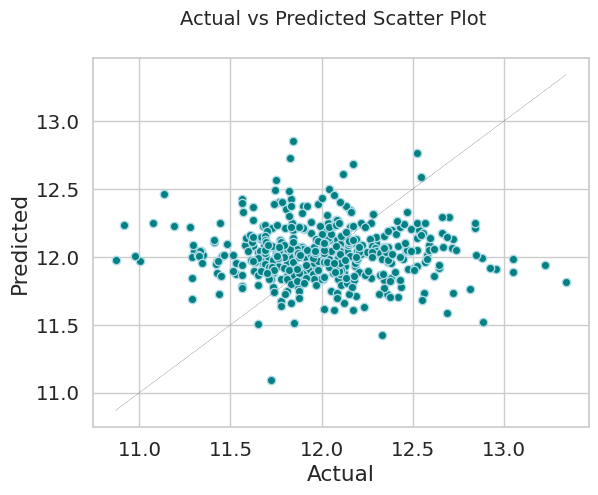

In [63]:
actual_vs_pred_plot(y_valid,y1_pred_v)

## **Ridge Model**
The second model used is Ridge Regression. Ridge Regression is a regularized version of linear regression. The parameter alpha is used to regularize the model. For alpha equal to zero, ridge regression is just a linear regression. RidgeCV model is used to implement ridge regression as it has a built-in cross validation of the alpha parameter. Sixteen different values of alpha between 7e-4 and 20 were used with a 10-fold cross validation. A pipeline using min-max scaler was built to apply to training, validation and testing data.

In [64]:
# to find the best value of alphas from this list, i will use RidgeCV
alphas_ = [ 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20]

# use robust scaler as unlike other scalers, the centering and scaling of ro bust scaler
#is based on percentiles and are therefore is not influenced by a few number of very large marginal outliers.

ridge = make_pipeline(MinMaxScaler(), linear_model.RidgeCV(alphas = alphas_, cv = 10))

In [65]:
cross_validation(ridge)

Mean CV score:  0.42154286816581227


In [66]:
#fit
model_ridge = ridge.fit(X_train, y_train)

#predict value of sale price on the training set
y2_pred = ridge.predict(X_train)

#caculate root mean square error
rmse(y2_pred,y_train)

rmse:  0.37814857316956413


In [67]:
#predict value of sale price on the valid set
y2_pred_v = ridge.predict(X_valid)

#caculate root mean square error
rmse(y2_pred_v, y_valid)

rmse:  0.395716274690963


<Figure size 1200x1200 with 0 Axes>

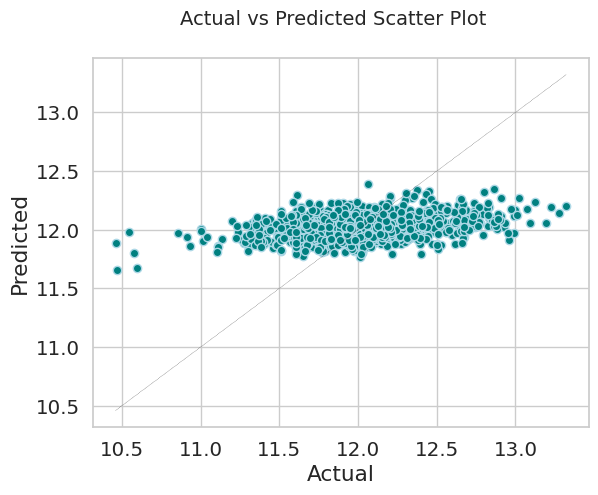

In [68]:
#plot
actual_vs_pred_plot(y_train,y2_pred)

### **K-NEAREST NEIGHBOUR REGRESSION MODEL**
K -nearest neighbour regressor is another popular model for regression tasks. It is a simple supervised machine learning model. The numbers of neighbours were set to three different values and the performance of this model was noted. Weights were set to uniform to assign equal weights to all points in each neighbourhood. The algorithm used was set to auto so that the best performing algorithm on the values was used. The leaf size was set to 25.

In [69]:
from sklearn.neighbors import KNeighborsRegressor

# N = 5 #
neigh = KNeighborsRegressor(n_neighbors = 5,
                            weights = 'uniform',
                            algorithm = 'auto',
                            leaf_size=25)
neigh.fit(X_train,y_train)

#predict value of sale price on the training set
y4_pred = neigh.predict(X_train)

#caculate root mean square error
rmse(y4_pred,y_train)

rmse:  0.36173563862877484


In [70]:
cross_validation(neigh)

Mean CV score:  0.4407410481546774


In [71]:
# N = 7 #
neigh1 = KNeighborsRegressor(n_neighbors = 7,
                             weights = 'uniform',
                             leaf_size=25)
neigh1.fit(X_train,y_train)

#predict value of quality on the training set
y_pred = neigh1.predict(X_train)

#caculate root mean square error
rmse(y_pred,y_train)

rmse:  0.3700558713729718


In [72]:
# N = 9 #
neigh2 = KNeighborsRegressor(n_neighbors = 9,
                             weights = 'uniform',
                             leaf_size=25)
neigh2.fit(X_train,y_train)

#predict value of quality on the training set
y_pred = neigh2.predict(X_train)

#caculate root mean square error
rmse(y_pred,y_train)

rmse:  0.3815646088348252


In [73]:
# N=5 performs best

In [74]:
#predict value of sale price on the validation set
y4_pred_v = neigh.predict(X_valid)

#caculate root mean square error
rmse(y4_pred_v, y_valid)

rmse:  0.4276053651284138


Note: rmse increases when values of k(no. of neighbours) increase

<Figure size 1200x1200 with 0 Axes>

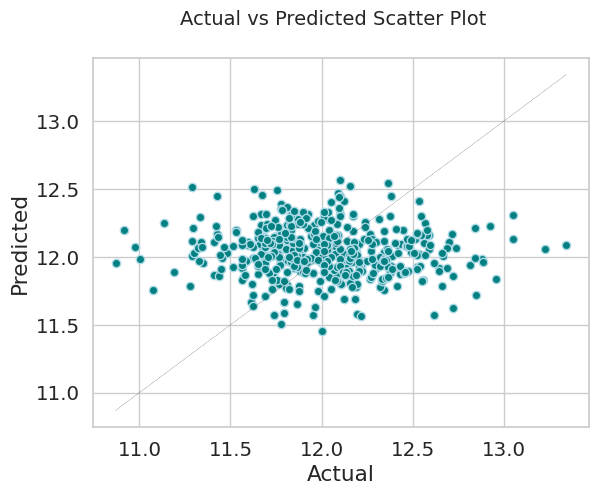

In [75]:
actual_vs_pred_plot(y_valid,y4_pred_v)

**Random Forest Model**

- Random forest model is an ensemble method based on randomized decision trees. Grid search was used to select the best parameters with a 5-fold cross validation. The number of trees in the forest was set to 200 with a maximum depth of 5 and 3 minimum leaves.

In [76]:
rforest = RandomForestRegressor(n_estimators=200,max_depth=13,random_state=42)

In [77]:
rforest = RandomForestRegressor(n_estimators= 200, max_depth=5, min_samples_leaf=3, random_state=42)

In [78]:
cross_validation(rforest)

Mean CV score:  0.40723487470053105


In [79]:
#fit
model_rforest = rforest.fit(X_train, y_train)

#predict value of sale price on the training set
y6_pred = rforest.predict(X_train)

#caculate root mean square error
rmse(y6_pred,y_train)

rmse:  0.36785043359700575


In [80]:
#predict value of sale price on the validation set
y6_pred_v = rforest.predict(X_valid)

#caculate root mean square error
rmse(y6_pred_v, y_valid)

rmse:  0.378854734417548


In [81]:
#0: 0.38852359192540425
#1: 0.38616747296757176

<Figure size 1200x1200 with 0 Axes>

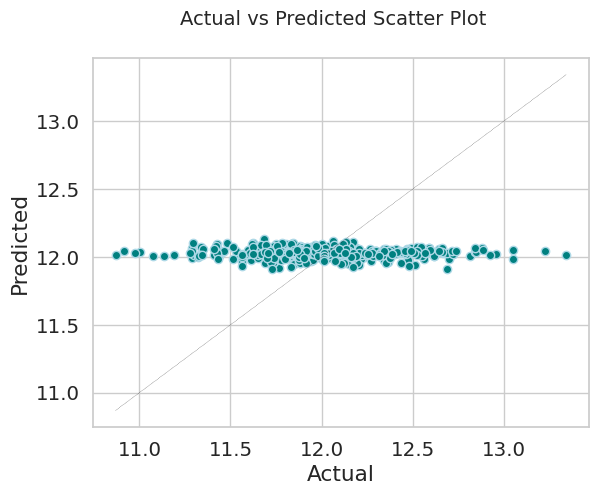

In [82]:
#plot
actual_vs_pred_plot(y_valid, y6_pred_v)

# **Stacked Regressor**
The final model used is the stacked regressor model. Stacking allows the power of each individual estimator to be used by using their output as a final estimator input. Random forest, K -nearest neighbour regressor and ridge regressor were stacked with random forest as the final estimator.

In [105]:
# using Random Forest,Support Vector Regressor and Gradient Boosting to build a stack model because they have lower RMSE comparatively
estimators = [('Random Forest', rforest),
              ("K",neigh),
              ("Ridge",ridge)
              ]

In [106]:
stacked = StackingRegressor(estimators = estimators, final_estimator = ridge, cv=5)

In [107]:
cross_validation(stacked)

Mean CV score:  0.4040806243630777


In [108]:
#fit
model_stack = stacked.fit(X_train, y_train)

#predict value of sale price on the training set
y9_pred = stacked.predict(X_train)

#caculate root mean square error
rmse(y9_pred,y_train)

rmse:  0.40762424332613234


In [109]:
#predict value of sale price on the validation set
y9_pred_v = stacked.predict(X_valid)

#caculate root mean square error
rmse(y9_pred_v, y_valid)

rmse:  0.3763361672433549


<Figure size 1200x1200 with 0 Axes>

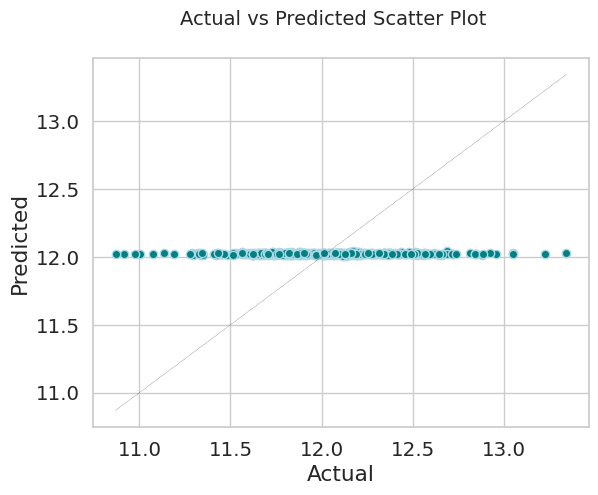

In [117]:
# plot
actual_vs_pred_plot(y_valid,y9_pred_v)

OBSERVATION
RMSE

1. Linear Reg: 0.43598040978098274
2. Ridge Reg: 0.39556353601642713
3. K-nearest: 0.4276053651284138
4.Random Forest: 0.3787380438700385
5. Stacked Regressor: 0.3763361672433549

# Test data prediction

In [111]:
X_test.shape

(1459, 285)

In [112]:
X_test.values

array([[2.0000e+01, 8.0000e+01, 1.1622e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 8.1000e+01, 1.4267e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [6.0000e+01, 7.4000e+01, 1.3830e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+01, 1.6000e+02, 2.0000e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.5000e+01, 6.2000e+01, 1.0441e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [6.0000e+01, 7.4000e+01, 9.6270e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [115]:
test_x = X_test.values

In [116]:
my_model = stacked
my_model.fit(X_train, y_train)
predictions = my_model.predict(X_test)
final_predictions = np.exp(predictions) - 1
#output = pd.DataFrame({'Id': test_data.index, 'SalePrice': final_predictions})
print(final_predictions)

[167144.81091789 168129.98434806 166976.37447747 ... 166177.47884708
 168815.57779806 166505.33790746]


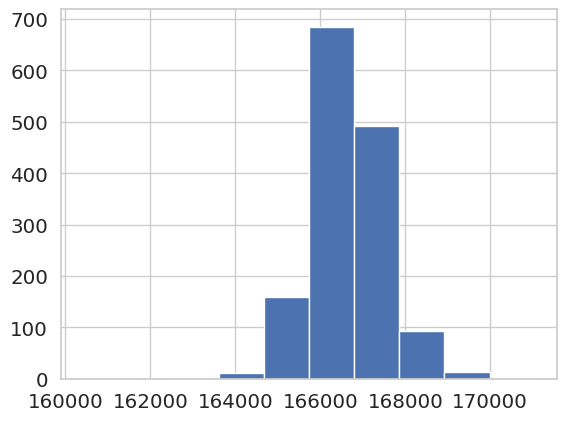

In [118]:
plt.hist(final_predictions)
plt.show()

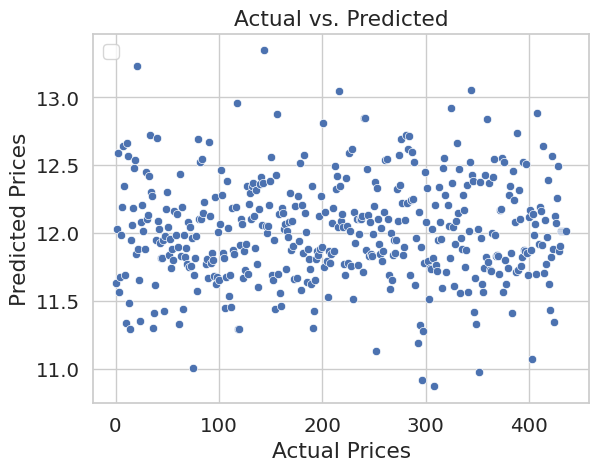

In [125]:
sns.scatterplot(y_valid)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted')
plt.legend(loc="upper left")

#sns.regplot(y_valid, final_predictions, label="Testing Data")

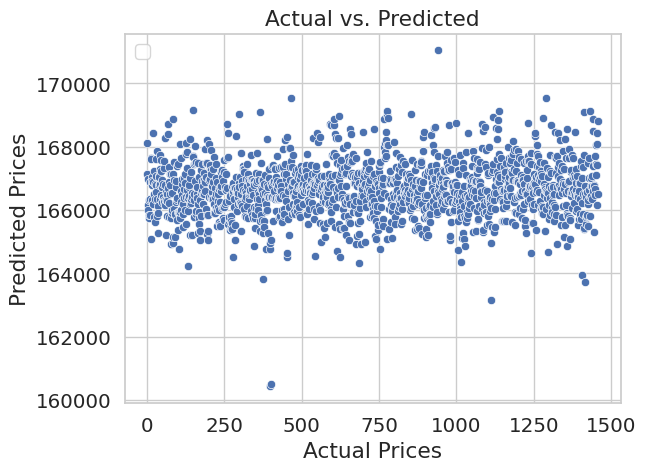

In [126]:
sns.scatterplot(final_predictions)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted')
plt.legend(loc="upper left")

#sns.regplot(y_valid, final_predictions, label="Testing Data")